<a href="https://colab.research.google.com/github/SalvatoreAdalberto/mlapp/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import tensorflow as tf 
import numpy as np

In [55]:
DIR_NORMAL = '/content/anomalyDetection_Normal.npy'
DIR_ISSUE = '/content/anomalyDetection_Issue.npy'

x = np.array(np.load(DIR_NORMAL))

In [56]:
def create_window(x, window_size=100, stride=1):
  result= []
  for i in range(len(x)-window_size+stride):
    result.append(x[i*stride : (i+window_size)*stride, :])
  return tf.stack(result)


In [57]:
ws = 100
x = create_window(x, ws)


In [58]:
from tensorflow.keras import layers

model = tf.keras.Sequential(
    [
        layers.Input(shape=(ws, 85)),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=85, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 50, 32)            19072     
                                                                 
 dropout_4 (Dropout)         (None, 50, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 25, 16)            3600      
                                                                 
 conv1d_transpose_6 (Conv1DT  (None, 50, 16)           1808      
 ranspose)                                                       
                                                                 
 dropout_5 (Dropout)         (None, 50, 16)            0         
                                                                 
 conv1d_transpose_7 (Conv1DT  (None, 100, 32)          3616      
 ranspose)                                            

In [66]:
history = model.fit(
    x,
    x,
    epochs=100,
    batch_size=128,
    validation_split=0.3,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)



Epoch 1/100
5/5 [==============================] - 4s 891ms/step - loss: 0.0080 - val_loss: 0.0087
Epoch 2/100
5/5 [==============================] - 2s 348ms/step - loss: 0.0080 - val_loss: 0.0092
Epoch 3/100
5/5 [==============================] - 4s 823ms/step - loss: 0.0079 - val_loss: 0.0091
Epoch 4/100
5/5 [==============================] - 1s 151ms/step - loss: 0.0078 - val_loss: 0.0092
Epoch 5/100
5/5 [==============================] - 1s 148ms/step - loss: 0.0078 - val_loss: 0.0093
Epoch 6/100
5/5 [==============================] - 3s 597ms/step - loss: 0.0077 - val_loss: 0.0095


In [68]:
x_pred = model.predict(x)

train_mae_loss = np.mean(np.abs(x_pred - x), axis=1)
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)



29/29 [==============================] - 1s 37ms/step
Reconstruction error threshold:  0.4326158


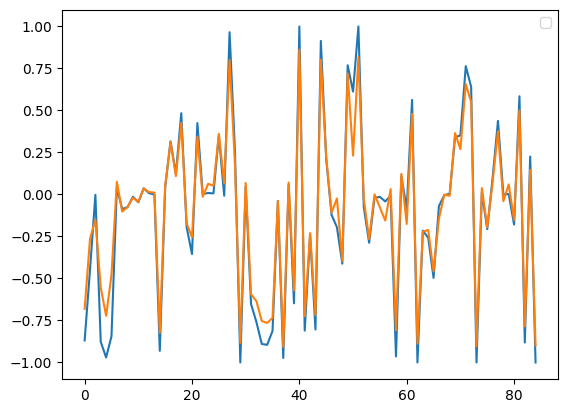

In [69]:
import matplotlib.pyplot as plt

plt.figure()
plt.legend()
plt.plot(x[0][0], label='ground_truth')
plt.plot(x_pred[0][0], label='reconstructed')
plt.show()

10/10 [==============================] - 0s 11ms/step


Reconstruction error threshold:  1.8307865


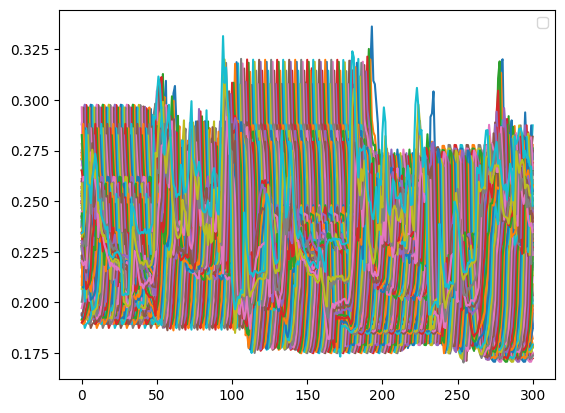

In [73]:
DIR_ISSUE = '/content/anomalyDetection_Issue.npy'

y = np.array(np.load(DIR_ISSUE))
ws = 100
y = create_window(y, ws)
y_pred = model.predict(y)

pred_mae_loss = np.mean(np.abs(y_pred - y), axis=-1)
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

import matplotlib.pyplot as plt

plt.figure()
plt.legend()
plt.plot(pred_mae_loss, label='ground_truth')
plt.show()